<a href="https://colab.research.google.com/github/Sebasttiann/Python-Inmuebles_Colombia/blob/main/Inmuebles_COL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
inmuebles = pd.read_csv("/content/drive/MyDrive/Python-Aula/inmuebles_bogota.csv")
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [7]:
inmuebles.shape

(9520, 8)

In [8]:
#VIsualizacion de columnas
inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [9]:
#Renombrar las columnas quitando caracteres especiales
columnas ={"Baños":"Banos", "Área": "Area" }
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3134,Apartamento,Apartamento en venta en Los Rosales,3,4,234,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,$ 2.190.000.000
8672,Apartamento,Apartamento en venta en Barrios Unidos,2,2,52,Barrios Unidos,Los Andes,$ 142.000.000
4930,Casa,Casa en venta en Antonio Nariño,5,4,364,Antonio Nariño,Restrepo,$ 750.000.000
8150,Apartamento,Apartamento en venta en Antonio Nariño,2,1,32,Antonio Nariño,Restrepo,$ 180.000.000
2717,Apartamento,Apartamento en venta en Ciudadela Colsubsidio,3,1,50,Ciudadela Colsubsidio,Bolivia,$ 190.000.000
6087,Apartamento,Apartamento en venta en Gran America,2,2,35,Gran America,Quinta Paredes,$ 250.000.000
2693,Apartamento,Apartamento en venta en Hayuelos,3,2,57,Hayuelos,Modelia,$ 225.000.000
303,Apartamento,Apartamento en venta en Kennedy,3,2,67,Kennedy,Kennedy Central,$ 320.000.000
9011,Apartamento,Apartamento en venta en Fontibón,3,2,51,Fontibón,Fontibón,$ 160.000.000
5777,Apartamento,Apartamento en venta en Engativa,4,2,95,Engativa,Engativá,$ 390.000.000


In [10]:
#Información del dataset
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [11]:
inmuebles.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

In [12]:
#Seleccion de atributos especificos
inmuebles.iloc[300:305]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
300,Apartamento,Apartamento en venta en Kennedy,2,1,42,Kennedy,Kennedy Central,$ 116.100.000
301,Apartamento,Apartamento en venta en Chico Norte,2,2,95,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 980.000.000
302,Apartamento,Apartamento en venta en Kennedy,3,2,54,Kennedy,Kennedy Central,$ 237.000.000
303,Apartamento,Apartamento en venta en Kennedy,3,2,67,Kennedy,Kennedy Central,$ 320.000.000
304,Apartamento,Apartamento en venta en Cedritos,4,4,132,Cedritos,Usaquén,$ 530.000.000


In [13]:
inmuebles["Valor"][300]

'$ 116.100.000'

In [14]:
inmuebles["Valor"][300:306]

300    $ 116.100.000
301    $ 980.000.000
302    $ 237.000.000
303    $ 320.000.000
304    $ 530.000.000
305    $ 503.000.000
Name: Valor, dtype: object

In [15]:
type(inmuebles["Valor"][300:306])

pandas.core.series.Series

In [16]:
#Promedio del area
inmuebles.Area.mean()

146.66470588235293

In [17]:
inmuebles.sample(100)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
8928,Apartamento,Apartamento en venta en Santa Barbara,2,3,99,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 540.000.000
7488,Apartamento,Apartamento en venta en Ciudad Salitre,3,3,98,Ciudad Salitre,Ciudad Salitre Oriental,$ 750.000.000
5099,Apartamento,Apartamento en venta en Bella Suiza,2,2,95,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 580.000.000
1188,Apartamento,Apartamento en venta en Chapinero,3,5,200,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.340.000.000
7278,Apartamento,Apartamento en venta en Cedritos,2,2,69,Cedritos,Usaquén,$ 327.000.000
...,...,...,...,...,...,...,...,...
361,Apartamento,Apartamento en venta en Teusaquillo,1,2,50,Teusaquillo,Teusaquillo,$ 303.960.000
8505,Oficina/Consultorio,Oficina/Consultorio en venta en Chapinero,1,1,20,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 135.000.000
1963,Local,Local en venta en Quinta Camacho,1,1,24,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 94.500.000
3036,Apartamento,Apartamento en venta en Santa Barbara,1,2,51,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 429.000.000


In [18]:
(inmuebles.Barrio == "Chico Reservado")

0       False
1       False
2        True
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Barrio, Length: 9520, dtype: bool

In [19]:
sum((inmuebles.Barrio == "Chico Reservado"))

225

In [20]:
inmuebles_CR = (inmuebles.Barrio == "Chico Reservado")
type(inmuebles_CR)

pandas.core.series.Series

In [21]:
chico_reservado = inmuebles[inmuebles_CR]
chico_reservado

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000
...,...,...,...,...,...,...,...,...
9299,Apartamento,Apartamento en venta en Chico Reservado,3,3,148,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 780.000.000
9335,Apartamento,Apartamento en venta en Chico Reservado,3,3,176,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9341,Apartamento,Apartamento en venta en Chico Reservado,2,3,118,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 700.000.000
9472,Apartamento,Apartamento en venta en Chico Reservado,3,1,49,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 200.000.000


In [22]:
#Promedio del área de Chico reservado
chico_reservado.Area.mean()

142.78666666666666

In [23]:
#Comparacion con la media de area total de Bogotá
inmuebles.Area.mean()

146.66470588235293

In [24]:
#Cuantos barrios en total hay en este dataset?
## se puede ver la cantidad de inmuebles x barrio
## se puede tomar al mismo tiempo el pandas series al momento de calcular esta cantidad de inmuebles y tener su longitud

len(inmuebles.Barrio.value_counts())

149



*   Value_counts: Devuelve el conteo de cada aparicion del nombre de barrio en especifico

**En total hay 149 barrios**

In [25]:
#Quieres saber cuales son los nombres de los barrios y cuantos inmuebles hay
inmuebles.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [26]:
#Cuantas UPZ se tienen de las 119 que hay en total en Bogotá?
len(inmuebles.UPZ.value_counts())

63

<Axes: >

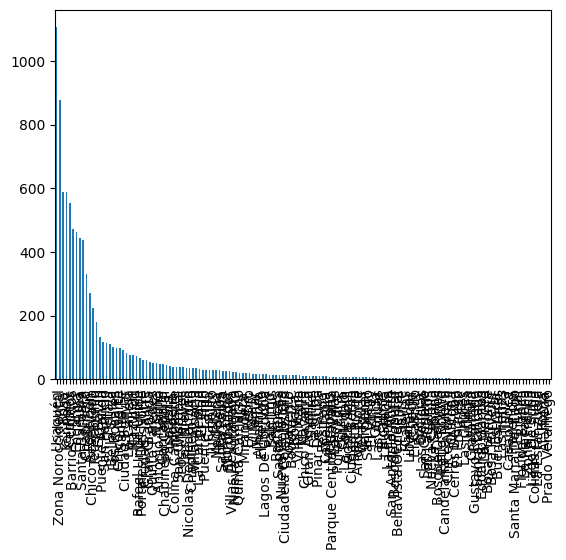

In [27]:
#Visualizar los barrios 
inmuebles_barrio= inmuebles.Barrio.value_counts()
inmuebles_barrio.plot.bar()

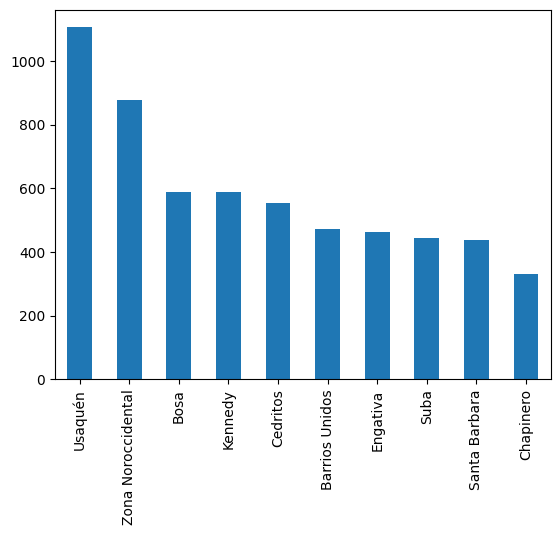

In [28]:
#Tomar el top 10 de barrios
inmuebles_barrio.head(10).plot.bar();

Aplicar función split : toma el espacio en blanco y realiza una separación. Separa una cadena de texto en funcion de un parametro que le pasemos.

In [29]:
inmuebles.Valor[0].split()

['$', '360.000.000']

*  Devuelve una lista con 2 elementos (pesos , “valor numerico”).

* Aplicar esto a toda la columna con la funcion str para convertirla en String

In [30]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

Se busca que no devuelva en forma de Pandas series, sino formato de Dataframe

In [31]:
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


Se crean 2 columnas nuevas: Moneda y precio. Para ello se le asigna la variable "valor" al código previo. Además, las columnas reciben el valor [0] y [1] del split respectivamente.

In [32]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles["Moneda"]= valor[0]
inmuebles["Precio"]= valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
6307,Casa,Casa en venta en Engativa,3,4,243,Engativa,Engativá,$ 850.000.000,$,850.000.000
2628,Apartamento,Apartamento en venta en Usaquén,3,4,190,Usaquén,Usaquén,$ 850.000.000,$,850.000.000
8769,Casa,Casa en venta en Fontibón,3,2,44,Fontibón,Fontibón,$ 138.000.000,$,138.000.000


Las nuevas columnas siguen siendo de tipo objeto/string

In [33]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Quitar el simbolo "." con funcion replace

In [34]:
inmuebles["Precio"]= inmuebles["Precio"].str.replace(".","", regex=True)

Visualizacion del precio de inmuebles por barrio como Dataframe

In [35]:
inmuebles[["Precio","Barrio"]]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


* Se transforma "Precio" a float y a millones de pesos colombianos creando la variable "Precio_millon"

In [36]:
inmuebles["Precio_millon"]= inmuebles.Precio.astype("float")/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [37]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


Se eliminan posiciones decimales a solo 2

In [38]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Localizacion del inmueble de 110 habitaciones 

In [39]:
inmuebles.loc[inmuebles.Habitaciones ==110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


Al parecer hubo un error de tipeo en las habitaciones

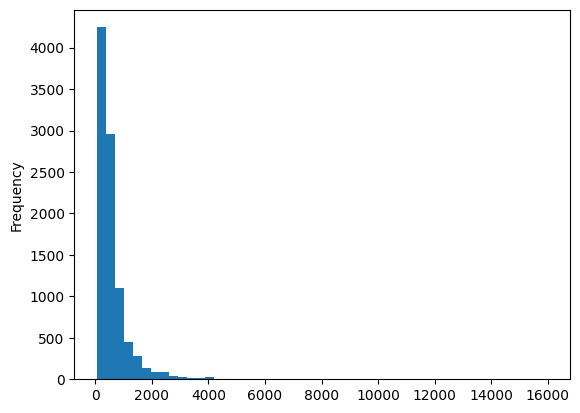

In [40]:
#Histograma
inmuebles["Precio_millon"].plot.hist(bins=50);

Se observa que el valor de la mayoria de los inmuebles se concentra entre 0 y 2 mil millones de pesos aproximadamente

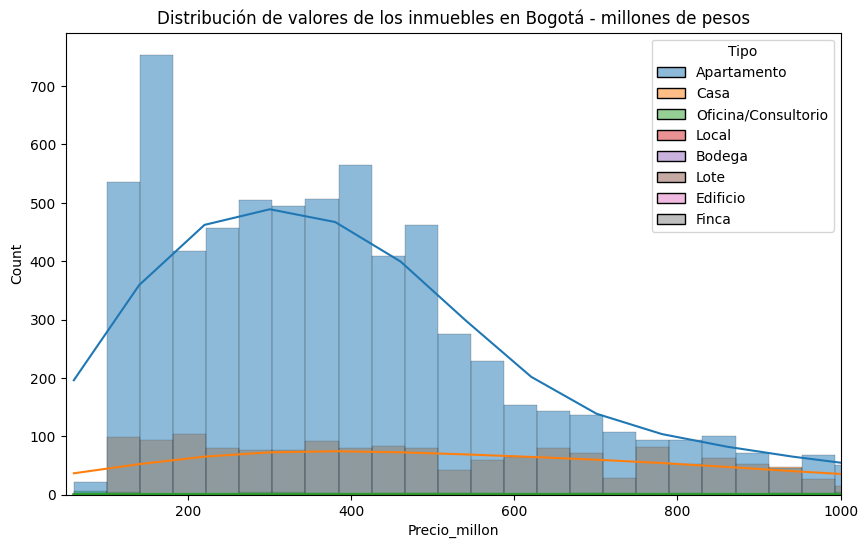

In [39]:
#importar matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica =sns.histplot(data=inmuebles, x="Precio_millon", kde=True, hue="Tipo")
grafica.set_title("Distribución de valores de los inmuebles en Bogotá - millones de pesos")
plt.xlim((50,1000))
plt.savefig("/content/drive/MyDrive/Python-Aula/valor_inmuebles.png", format="png")
plt.show()

Cálculo del precio del m2 por barrio

In [41]:
#Tomar el precio de todo el dataset / Area del dataset
inmuebles["Valor_m2_millon"]= inmuebles["Precio_millon"]/inmuebles["Area"]

In [42]:
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon,Valor_m2_millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


In [43]:
#Promedios según el tipo de Barrio
inmuebles.groupby("Barrio").mean()

,Habitaciones,Banos,Area,Precio_millon,Valor_m2_millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [44]:
#Suma conjunta de propiedades por Barrio
datos_barrio = inmuebles.groupby("Barrio").sum()
datos_barrio

,Habitaciones,Banos,Area,Precio_millon,Valor_m2_millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [45]:
#Cálculo adecuado del promedio con respecto a cada Barrio
datos_barrio["Valor_m2_barrio"] = datos_barrio['Precio_millon']/datos_barrio["Area"]
datos_barrio

,Habitaciones,Banos,Area,Precio_millon,Valor_m2_millon,Valor_m2_barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [46]:
m2_barrio = dict(datos_barrio["Valor_m2_barrio"])

In [47]:
#Duplicas una columna y la asignas a la nueva columna
inmuebles["Valor_m2_barrio"] = inmuebles["Barrio"]
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon,Valor_m2_millon,Valor_m2_barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,Zona Noroccidental
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,Castilla
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,Chico Reservado


In [48]:
inmuebles["Valor_m2_barrio"] = inmuebles["Valor_m2_barrio"].map(m2_barrio) 
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon,Valor_m2_millon,Valor_m2_barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10


In [49]:
#Indices de los 10 primerios barrios
top_barrios = inmuebles["Barrio"].value_counts()[:10].index 

In [50]:
#Transformar el indice Barrio de datos_barrio a una columna
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_millon,Valor_m2_millon,Valor_m2_barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [51]:
datos_barrio.query("Barrio in @top_barrios")

,Barrio,Habitaciones,Banos,Area,Precio_millon,Valor_m2_millon,Valor_m2_barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


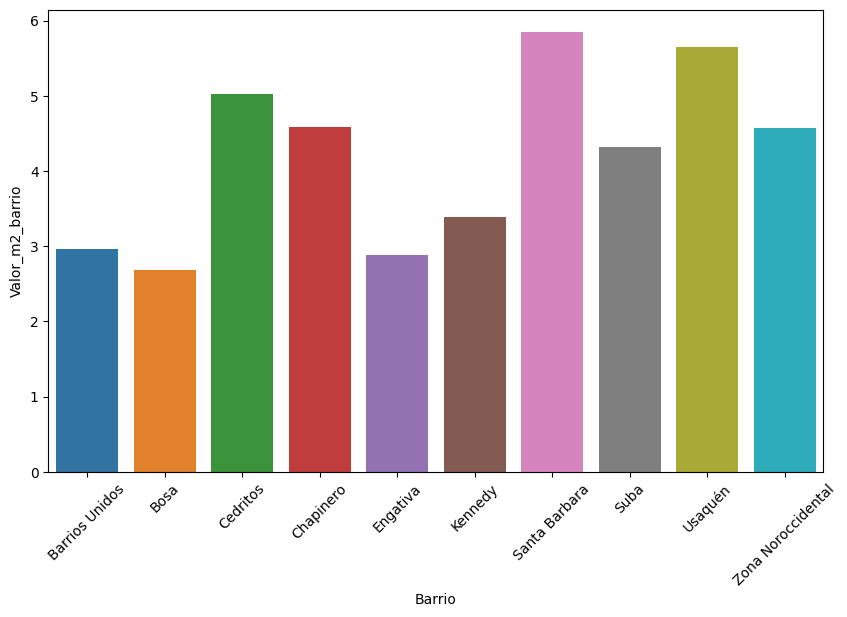

In [61]:
#Grafico de barrars de los 10 barrios con mayores inmuebles a la venta
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Barrio",y="Valor_m2_barrio", data= datos_barrio.query("Barrio in @top_barrios"))
ax.tick_params(axis="x", rotation=45)

Del top 10 de barrios con mayores inmuebles en venta, Santa Bárbara lidera los barrios y también cuenta con el mayor precio de m2 (de este top).

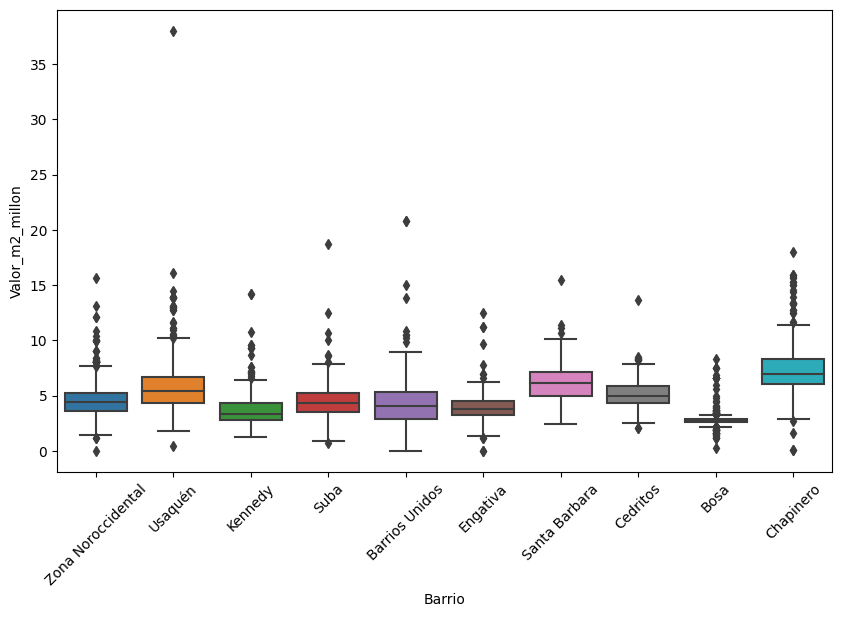

In [72]:
#Boxplot del valor de m2 en millones
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Barrio", y="Valor_m2_millon", data = inmuebles.query("Barrio in @top_barrios"))
ax.tick_params(axis="x", rotation=45)



1.   Barrios Unidos: El 50% (mediana-segundo cuartil) de los valores por m2 de inmuebles en este barrio se encuentra por debajo de 5 millones de pesos




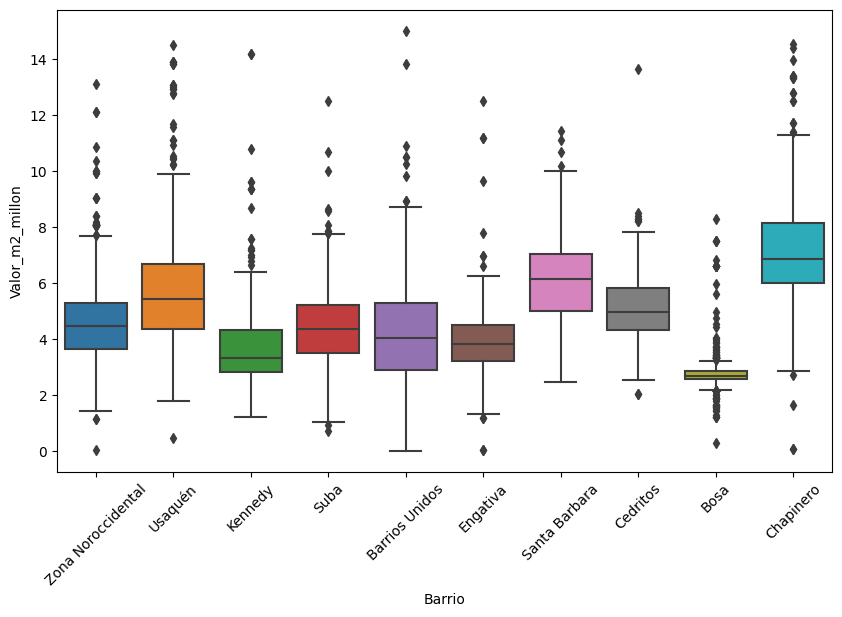

In [73]:
#ELiminar los outliers del grafico
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Barrio", y="Valor_m2_millon", data = inmuebles.query("Barrio in @top_barrios & Valor_m2_millon<15"))
ax.tick_params(axis="x", rotation=45)

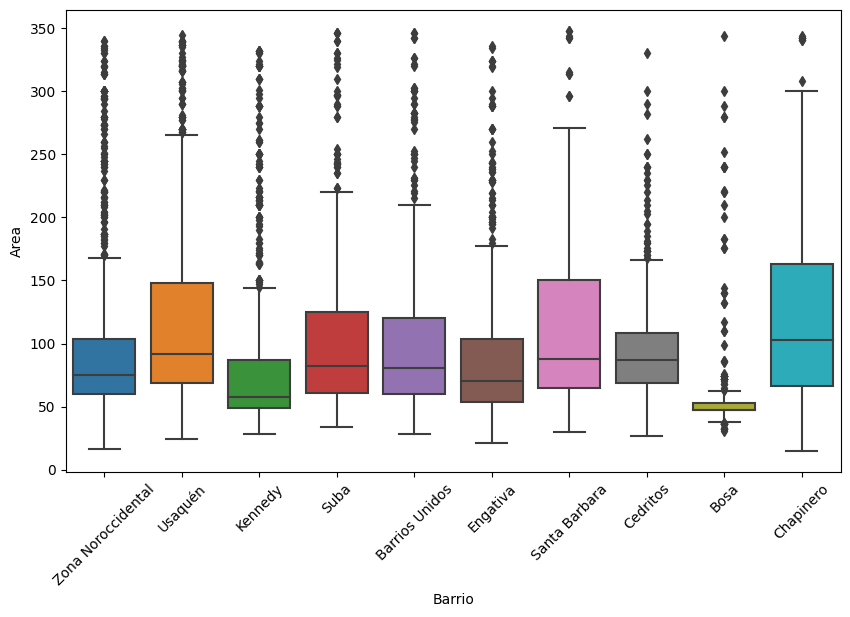

In [77]:
#Boxplot del Area
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Barrio", y="Area", data = inmuebles.query("Barrio in @top_barrios & Area<350"))
ax.tick_params(axis="x", rotation=45)



1.   Se observa que en Chapinero están los inmuebles de mayor area. Su mediana y media están por encima de los otros barrios.
2.   EN Kennedy cuentan con una mediana de area de los inmubeles menor que la del resto



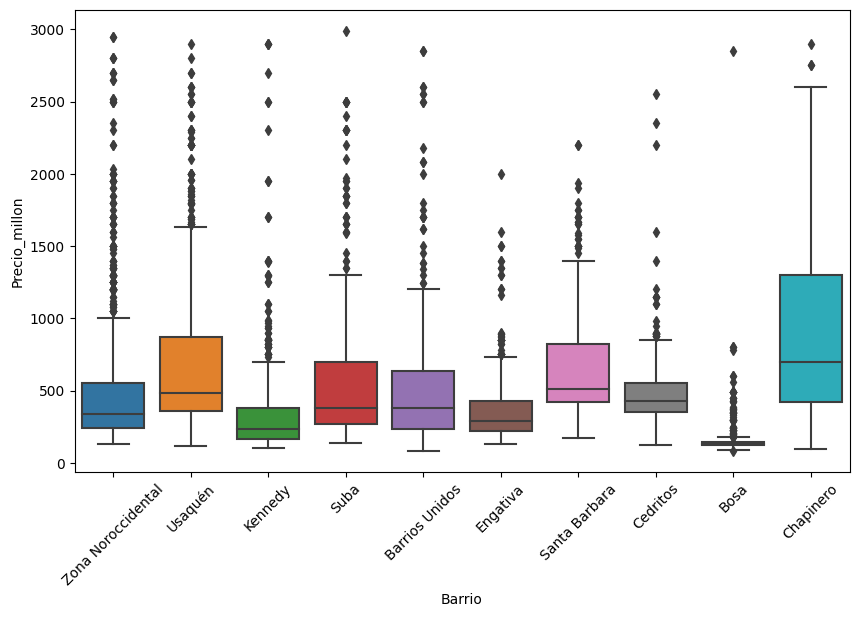

In [79]:
#Boxplot del precio de inmuebles en millones
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Barrio", y="Precio_millon", data = inmuebles.query("Barrio in @top_barrios & Precio_millon<3000"))
ax.tick_params(axis="x", rotation=45)

*  Del top de barrios con más inmuebles a la venta, el barrio de chapinero cuenta con los precios de inmuebles más elevados

Se extraen datos estadísticos de la ciudad de Bogotá, directamente del instituto nacional de estadistica DANE con el fin de estudiar como estos ayudaríann en inclusión de nuevas variables para el cálculo del precio de los inmuebles.

**Considero la Encuesta Multiproposito de Bogotá para obtener información socio-económica y de entorno urbano de los habitantes de Bogotá para la formulación, seguimiento y evaluación de las políticas distritales.**

In [52]:
data_raw = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Identificación (Capítulo A).csv",sep=";", encoding="latin-1")
data_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


* MPIO: Municipio
* 11001: Bogota D.C

In [53]:
#Tamaño del dataset incluyendo area rural
data_raw.shape

(106467, 11)

In [54]:
#Localizar datos referentes al municipio de Bogota D.C
data_raw = data_raw.loc[data_raw.MPIO == 11001]
data_raw.shape

(86504, 11)

In [55]:
data_b = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Datos de la vivenda y su entorno (Capítulo B).csv",sep=";", encoding="latin-1")
data_c = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Condiciones habitacionales del hogar (Capítulo C).csv",sep=";", encoding="latin-1")
data_d = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Composición del hogar y demografía (Capítulo E).csv",sep=";", encoding="latin-1")
data_e = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Educación (Capítulo H).csv",sep=";", encoding="latin-1")
data_f = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv",sep=";", encoding="latin-1")
data_g = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Fuerza de trabajo (Capítulo K).csv",sep=";", encoding="latin-1")

<ipython-input-55-2ee6af9cd3ed>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_c = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Condiciones habitacionales del hogar (Capítulo C).csv",sep=";", encoding="latin-1")
<ipython-input-55-2ee6af9cd3ed>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  data_d = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Composición del hogar y demografía (Capítulo E).csv",sep=";", encoding="latin-1")
<ipython-input-55-2ee6af9cd3ed>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  data_e = pd.read_csv("/content/drive/MyDrive/Python-Aula/DANE/Educación (Capítulo H).csv",sep=";", encoding="latin-1")
<ipython-input-55-2ee6af9cd3ed>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  

In [56]:
dane_data = pd.merge(data_raw,data_b, on = "DIRECTORIO", how="left")
dane_data.shape

(86504, 73)

In [57]:
dane_data = pd.merge(dane_data,data_c, on = "DIRECTORIO", how="left")
dane_data.shape

(87061, 214)

In [58]:
dane_data = pd.merge(dane_data,data_d, on = "DIRECTORIO", how="left")
dane_data.shape

<ipython-input-58-96fc7a462fb4>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  dane_data = pd.merge(dane_data,data_d, on = "DIRECTORIO", how="left")


(238559, 281)

In [59]:
dane_data = pd.merge(dane_data,data_e, on = "DIRECTORIO", how="left")
dane_data.shape

(783952, 416)

In [60]:
dane_data = pd.merge(dane_data,data_f, on = "DIRECTORIO", how="left")
dane_data.shape

<ipython-input-60-d248ea57d981>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SECUENCIA_P_x', 'DIRECTORIO_HOG_x', 'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  dane_data = pd.merge(dane_data,data_f, on = "DIRECTORIO", how="left")


(867264, 594)

In [ ]:
dane_data = pd.merge(dane_data,data_g, on = "DIRECTORIO", how="left")
dane_data.shape

In [ ]:
datos_dane.shape

In [ ]:
datos_dane.info()